In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pathA = os.path.join("..", "data", "MaybeData", "International", "DP_LIVE_21032019024128590.csv")
oecd_data = pd.read_csv(pathA)
oecd_df = pd.DataFrame(oecd_data)
oecd_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2014,12.3,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2015,12.8,NaN
2,AUT,SUICIDE,TOT,100000PER,A,2014,13.9,NaN
3,AUT,SUICIDE,TOT,100000PER,A,2015,12.9,NaN
4,AUT,SUICIDE,TOT,100000PER,A,2016,12.2,NaN


In [2]:
# len(oecd_df.groupby(["LOCATION"]).groups)     # 38 countries, 
# oecd_df.groupby('LOCATION').first()          # all w values for 2014
# oecd_df.groupby('LOCATION').last()          # some ONLY have data for 2014
# with no population data or economica data, visualization is bland.
oecd_group = pd.DataFrame(oecd_df.groupby('LOCATION', as_index=False).first())
oecd_group.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2014,12.3,NaN
1,AUT,SUICIDE,TOT,100000PER,A,2014,13.9,NaN
2,BEL,SUICIDE,TOT,100000PER,A,2014,16.1,NaN
3,BRA,SUICIDE,TOT,100000PER,A,2014,5.7,NaN
4,CHE,SUICIDE,TOT,100000PER,A,2014,12.0,NaN


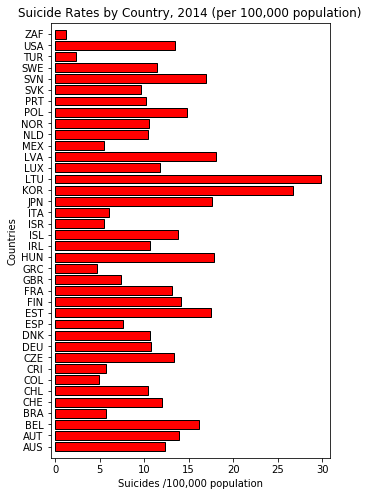

In [13]:
y_axis = np.arange(len(oecd_group))
labels = oecd_group.loc[:,"LOCATION"]
# ..., tick_labels=labels) arg in plt.barh gives Attribute error, unknown property

plt.figure(figsize=(5,8))
plt.barh(y_axis, oecd_group["Value"], color='r', align="center", \
         edgecolor='k', linewidth=1)
plt.xlim(-0.5, (oecd_group["Value"]).max()+1)
plt.ylim(-1, len(oecd_group))
plt.title("Suicide Rates by Country, 2014 (per 100,000 population)")
plt.xlabel("Suicides /100,000 population")
plt.ylabel("Countries")
plt.yticks(y_axis, labels)   

plt.savefig("../Images/internat_suic_unsort.png")
plt.show()

In [5]:
pathB = os.path.join("..", "data", "MaybeData", "International", "master.csv")
who_data = pd.read_csv(pathB)
who_df = pd.DataFrame(who_data)
who_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
# len(who_df.groupby(["country"]).groups)        # 101 countries?
who_df.groupby(["country"]).groups
# len(who_df)             
#27820 rows, 264 entries/country; 12 age+gender rows/yr x 10yrs (2 missing)

# countries = []    
# for i in len(who_df):
#     if who_df.loc[i,"coutry"] not in countries:
#         countries.append(who_df.loc[i,country])
# print(*countries)

# who_group = pd.DataFrame(who_df.groupby('country', as_index=False).first())
# who_group.head(10)

{'Albania': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             254, 255, 256, 257, 258, 259, 260, 261, 262, 263],
            dtype='int64', length=264),
 'Antigua and Barbuda': Int64Index([264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
             ...
             578, 579, 580, 581, 582, 583, 584, 585, 586, 587],
            dtype='int64', length=324),
 'Argentina': Int64Index([588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
             ...
             950, 951, 952, 953, 954, 955, 956, 957, 958, 959],
            dtype='int64', length=372),
 'Armenia': Int64Index([ 960,  961,  962,  963,  964,  965,  966,  967,  968,  969,
             ...
             1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257],
            dtype='int64', length=298),
 'Aruba': Int64Index([1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267,
             ...
             1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425],
            d